In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def show_trace_2d(f, res):
    """Show the trace of 2D variables during optimization."""
    x1, x2 = zip(*res)
    plt.rcParams['figure.figsize'] = (3.5, 2.5)
    plt.plot(x1, x2, '-o', color='#ff7f0e')
    x1 = np.arange(-5.5, 1.0, 0.1)
    x2 = np.arange(min(-3.0, min(x2) - 1), max(1.0, max(x2) + 1), 0.1)
    x1, x2 = np.meshgrid(x1, x2)
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')

In [3]:
def train_2d(trainer):
    """Optimize a 2-dim objective function with a customized trainer."""
    # s1 and s2 are internal state variables and will 
    # be used later in the chapter
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

In [4]:
def f(x1, x2): return x1 ** 2 + 2 * x2 ** 2 # objective
def gradf(x1, x2): return (2 * x1, 4 * x2) # gradient

def sgd(x1, x2, s1, s2): # simulate noisy gradient
    (g1, g2) = gradf(x1, x2) # compute gradient
    (g1, g2) = (g1 + np.random.normal(0.1), g2 + np.random.normal(0.1))
    return (x1 -eta * g1, x2 -eta * g2, 0, 0) # update variables

epoch 20, x1 -0.171732, x2 0.180890


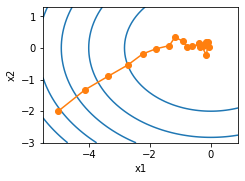

In [5]:
eta = 0.1
show_trace_2d(f, train_2d(sgd))